In [ ]:
import torch
import torchvision
from torchvision import transforms

image_path = './'
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(
    root=image_path,train=True,transform=transform,download=True
)
from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset,torch.arange(10000))
mnist_train_dataset = Subset(mnist_dataset,torch.arange(10000,len(mnist_dataset)))
mnist_test_dataset = torchvision.datasets.MNIST(
    root=image_path,train=False,transform=transform,download=False
)

100%|██████████| 9912422/9912422 [00:00<00:00, 104274520.69it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 32063444.63it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 28835437.78it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7019354.74it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



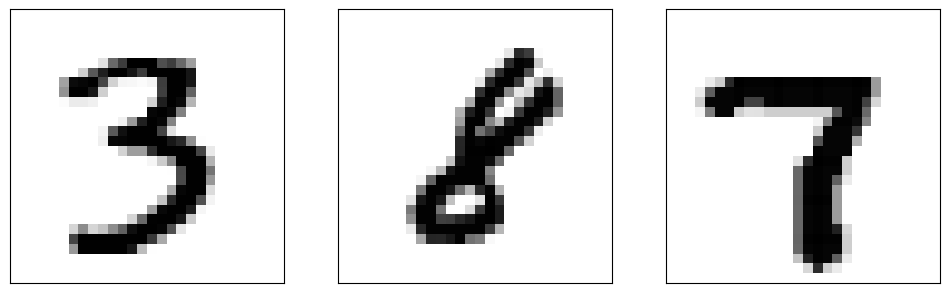

In [ ]:
#visualizamos algunas muestras del dataset
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,4))
for i in range(3):
  eje = fig.add_subplot(1,3,i+1)
  eje.set_xticks([])
  eje.set_yticks([])
  img = mnist_train_dataset[i][0][0,:,:]
  eje.imshow(img,cmap='gray_r')
plt.show()

In [ ]:
from torch.utils.data import DataLoader
batch_size = 1
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset,batch_size,shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset,batch_size,shuffle=False)

In [ ]:
loss=nn.MSELoss()
for x,y in train_dl:
  print(x)
  print(model(x))
  print(y)
  print(loss(model(x),y))
  break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
import torch.nn as nn

model = nn.Sequential()
model.add_module(
    'conv1',
    nn.Conv2d(
        in_channels=1,out_channels=16,
        kernel_size=5,padding=2
    )
)
model.add_module('relu1',nn.ReLU())
#en la capa pool kernel_size=2 y por default stride=2
model.add_module('pool1',nn.MaxPool2d(kernel_size=2))
model.add_module(
    'conv2',
    nn.Conv2d(
        in_channels=16,out_channels=32,
        kernel_size=5,padding=2
    )
)
model.add_module('relu2',nn.ReLU())
model.add_module('pool2',nn.MaxPool2d(kernel_size=2))
model.add_module('flatten',nn.Flatten())
x=torch.ones((4,1,28,28))
model(x).shape

torch.Size([4, 1568])

In [ ]:

model.add_module('fc1',nn.Linear(1568,512))
model.add_module('relu3',nn.ReLU())
model.add_module('dropout',nn.Dropout(p=0.5))
model.add_module('fc2',nn.Linear(512,10))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

def train(model, num_epochs,train_dl,valid_dl):
  loss_hist_train = [0 for i in range(num_epochs)]
  accuracy_hist_train = [0 for i in range(num_epochs)]
  loss_hist_valid = [0 for i in range(num_epochs)]
  accuracy_hist_valid = [0 for i in range(num_epochs)]
  for epoch in range(num_epochs):
    model.train()
    for x_batch,y_batch in train_dl:
      pred = model(x_batch)
      loss = loss_fn(pred,y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      loss_hist_train[epoch] += loss.item()*y_batch.size(0)
      is_correct = (torch.argmax(pred,dim=1)==y_batch).float()
      print(is_correct)
      accuracy_hist_train[epoch] += is_correct.sum()
    loss_hist_train[epoch] /= len(train_dl.dataset)
    accuracy_hist_train[epoch] /= len(train_dl.dataset)

    model.eval()
    with torch.no_grad():
      for x_batch,y_batch in valid_dl:
        pred = model(x_batch)
        loss = loss_fn(pred,y_batch)
        loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred,dim=1)==y_batch).float()
        accuracy_hist_valid[epoch] += is_correct.sum()
    loss_hist_valid[epoch] /= len(valid_dl.dataset)
    accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

    print(f'Epoch {epoch+1} accuracy: '
          f'{accuracy_hist_train[epoch]:.4f} val_accuracy: '
          f'{accuracy_hist_valid[epoch]:.4f}')
  return loss_hist_train,loss_hist_valid,accuracy_hist_train,accuracy_hist_valid




In [ ]:
torch.manual_seed(1)
num_epochs = 20
hist = train(model,num_epochs,train_dl,valid_dl)

tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([1.])
tensor([1.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([1.])
tensor([0.])
tensor([1.])
tensor([1.])

KeyboardInterrupt: 

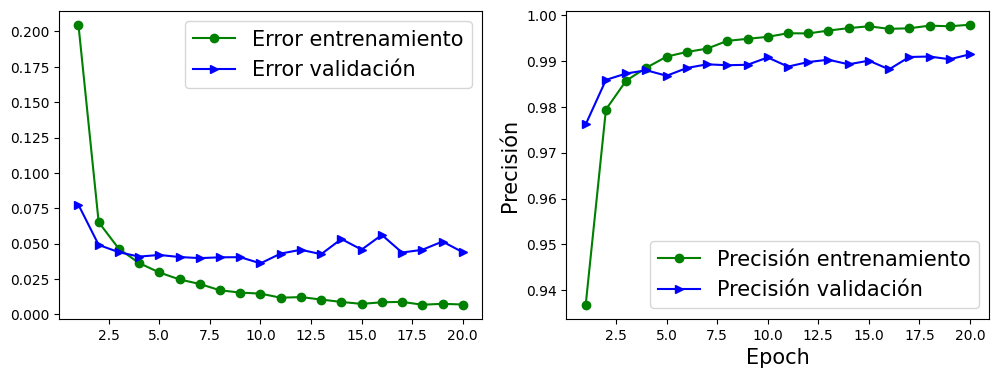

In [ ]:
import numpy as np

x_arr = np.arange(len(hist[0]))+1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist[0],'-o',color='g',label='Error entrenamiento')
ax.plot(x_arr,hist[1],'->',color='b',label='Error validación')
ax.legend(fontsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist[2],'-o',color='g',label='Precisión entrenamiento')
ax.plot(x_arr,hist[3],'->',color='b',label='Precisión validación')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size=15)
ax.set_ylabel('Precisión',size=15)
plt.show()


In [ ]:
pred = model(mnist_test_dataset.data.unsqueeze(1)/255.)
is_correct = (torch.argmax(pred,dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')


Test accuracy: 0.9937


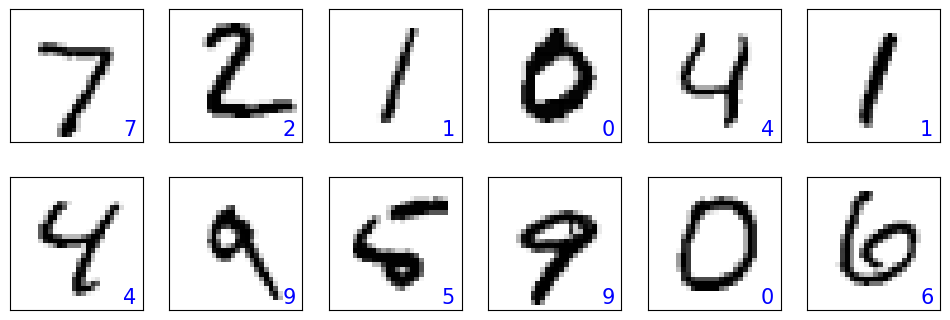

In [ ]:
fig = plt.figure(figsize=(12,4))
for i in range(12):
  ax = fig.add_subplot(2,6,i+1)
  ax.set_xticks([]);ax.set_yticks([])
  img = mnist_test_dataset[i][0][0,:,:]
  pred = model(img.unsqueeze(0).unsqueeze(1))
  y_pred = torch.argmax(pred)
  ax.imshow(img,cmap='gray_r')
  ax.text(0.9,0.1,y_pred.item(),
          size=15,color='blue',
          horizontalalignment='center',
          verticalalignment='center',
          transform=ax.transAxes)
plt.show()